In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import math

import random

In [6]:
#ex1: shuffle image

In [33]:
img = cv2.imread('images/4.jpeg')
sections = []
numrows, numcols = 10,10
height = int(img.shape[0] / numrows)
width = int(img.shape[1] / numcols)
for row in range(numrows):
    for col in range(numcols):
        y0 = row * height
        y1 = y0 + height
        x0 = col * width
        x1 = x0 + width
        sections.append(img[y0:y1, x0:x1])
        # print(y0,y1,x0,x1)
        cv2.imwrite('tile1/tile_%d%d.jpeg' % (row, col), img[y0:y1, x0:x1])

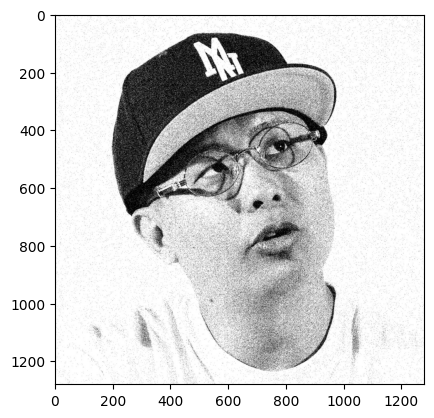

In [34]:
plt.imshow(img)

In [35]:
random.shuffle(sections)

full_image = np.concatenate(
    [np.concatenate([sections[col*5+row] for row in range(numrows)], axis = 0) for col in range(numcols)], axis = 1
)

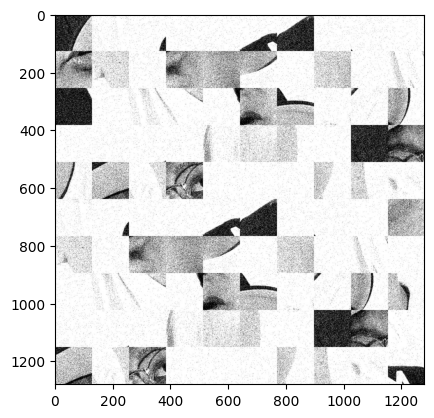

In [36]:
plt.imshow(full_image)

In [37]:
#ex2: shuffle image ~locally~

In [38]:
def shuffle_image_by_tiles(image, tiles):
    '''
    image: string, path
    tiles: tuple, number of tiles
    '''
    img = image
    
    sections = []
    numrows, numcols = tiles
    height = int(img.shape[0] / numrows)
    width = int(img.shape[1] / numcols)
    
    for row in range(numrows):
        for col in range(numcols):
            y0 = row * height
            y1 = y0 + height
            x0 = col * width
            x1 = x0 + width
            sections.append(img[y0:y1, x0:x1])
            # print(y0,y1,x0,x1)
            # cv2.imwrite('tile1/tile_%d%d.jpeg' % (row, col), img[y0:y1, x0:x1])
    random.shuffle(sections)

    image_put_back_together = np.concatenate(
        [np.concatenate([sections[col*numrows+row] for row in range(numrows)], axis = 0) for col in range(numcols)], axis = 1
    )
    return image_put_back_together

In [39]:
img = cv2.imread('images/4.jpeg')
sections = []
numrows, numcols = 5,5
height = int(img.shape[0] / numrows)
width = int(img.shape[1] / numcols)
for row in range(numrows):
    for col in range(numcols):
        y0 = row * height
        y1 = y0 + height
        x0 = col * width
        x1 = x0 + width
        sections.append(img[y0:y1, x0:x1])
        # print(y0,y1,x0,x1)
        # cv2.imwrite('tile1/tile_%d%d.jpeg' % (row, col), img[y0:y1, x0:x1])

In [40]:
sections_shuffled = []
for section in sections:
    sections_shuffled.append(shuffle_image_by_tiles(section, (2,2)))

In [41]:
full_image = np.concatenate(
    [np.concatenate([sections_shuffled[row*5+col] for row in range(numrows)], axis = 0) for col in range(numcols)], axis = 1
)

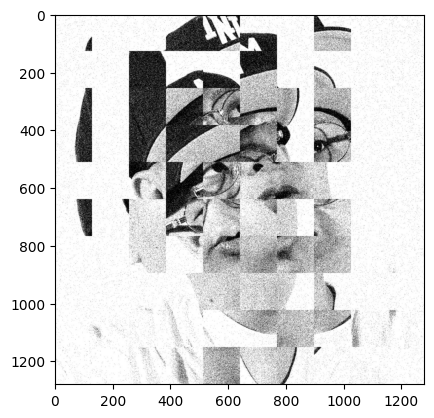

In [42]:
plt.imshow(full_image)

In [43]:
img = cv2.imread('images/2.jpeg')
sections = []
numrows, numcols = 5,5
height = int(img.shape[0] / numrows)
width = int(img.shape[1] / numcols)
for row in range(numrows):
    for col in range(numcols):
        y0 = row * height
        y1 = y0 + height
        x0 = col * width
        x1 = x0 + width
        sections.append(img[y0:y1, x0:x1])
        # print(y0,y1,x0,x1)
        # cv2.imwrite('tile1/tile_%d%d.jpeg' % (row, col), img[y0:y1, x0:x1])

In [15]:
sections_shuffled = []
for section in sections:
    sections_shuffled.append(shuffle_image_by_tiles(section, (2,2)))

In [16]:
full_image = np.concatenate(
    [np.concatenate([sections_shuffled[row*5+col] for row in range(numrows)], axis = 0) for col in range(numcols)], axis = 1
)

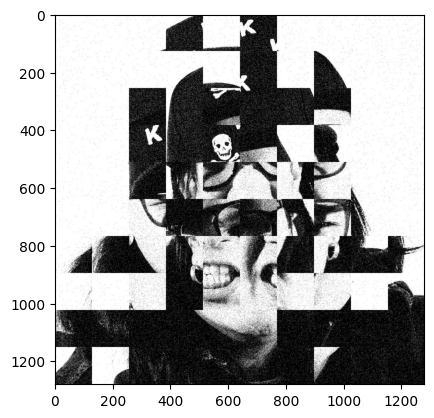

In [17]:
plt.imshow(full_image)

In [20]:
#ex3: shuffle all images 

In [27]:
def get_tiles(image, tiles):
    '''
    image: string, path
    tiles: tuple, number of tiles
    '''
    img = cv2.imread(image)
    
    sections = []
    numrows, numcols = tiles
    height = int(img.shape[0] / numrows)
    width = int(img.shape[1] / numcols)
    
    for row in range(numrows):
        for col in range(numcols):
            y0 = row * height
            y1 = y0 + height
            x0 = col * width
            x1 = x0 + width
            sections.append(img[y0:y1, x0:x1])

    return sections

In [28]:
images_tiled = [
    get_tiles('images/1.jpeg', (10,10)),
    get_tiles('images/2.jpeg', (10,10)),
    get_tiles('images/3.jpeg', (10,10)),
    get_tiles('images/4.jpeg', (10,10)),
    get_tiles('images/5.jpeg', (10,10)),
    get_tiles('images/6.jpeg', (10,10))
]

In [29]:
full_image = np.concatenate(
    [np.concatenate([random.choice(images_tiled)[row*10+col] for row in range(numrows)], axis = 0) for col in range(numcols)], axis = 1
)

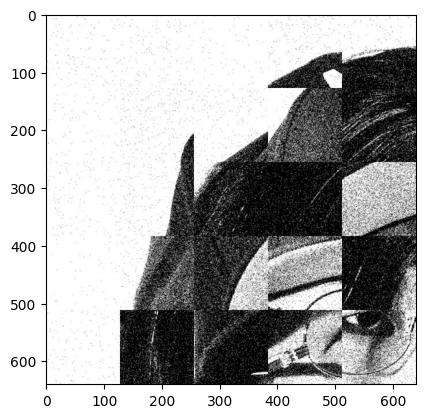

In [30]:
plt.imshow(full_image)

In [220]:
for i in range(240):
    full_image = np.concatenate([np.concatenate([random.choice(images_tiled)[row*10+col] for row in range(numrows)], axis = 0) for col in range(numcols)], axis = 1)
    cv2.imwrite(f'output/album_art{i}.jpeg', full_image)

In [26]:
cv2.imwrite('album_art.jpeg', full_image)

True